In [1]:
#Q1: The standard deviation measures the dispersion of individual data points within a single data set from the mean, indicating the overall dispersion of the data. 
    # It tells us the typical degree to which each data point deviates from the mean. In contrast, SEM measures the precision of the sample mean as an 
    # estimate of the true overall mean. It estimates how much the sample mean would change if samples were repeatedly drawn from the overall population.
    # Whereas SD describes the variability of individual data points, SEM reflects the precision of the mean and decreases as the 
    # sample size increases, resulting in a more accurate estimate of the overall mean.


In [2]:
#Q2: To establish a 95% confidence interval (CI) using the standard error of the mean (SEM), 
    # we need to estimate the range in which we would see 95% of the sample means fall if we repeated 
    # the sampling from the whole population. First, calculate the sample mean and SEM. then, 
    # depending on the size of the sample, use the critical value: 1.96 for large samples and a t-value for 
    # small samples. The CI is obtained by adding and subtracting the product of the critical value and the SEM 
    # from the sample mean.
    # For bootstrapped samples (many new samples resulting from resampling of the original data), 
    # the CI is a direct estimate of the likely range of the true overall mean by taking the middle 95% 
    # of the mean of these resamplings.

In [3]:
# Q3: To create a 95% bootstrapped confidence interval without using standard deviation for estimating standard error, 
    # follow the percentile method. First, draw a large number of bootstrapped samples (e.g., 1,000) from your original data. 
    # Then, calculate the mean for each sample to create a distribution of bootstrapped means and sort these means in ascending order. 
    # To find the confidence interval, identify the 2.5th and 97.5th percentiles of the sorted means; these will serve as the lower and 
    # upper bounds. This method directly estimates the range for the true population mean without relying on standard error calculations.

In [4]:
# Interaction log for Q1-Q3: https://chatgpt.com/share/66ff5395-9318-8000-bb2b-149f56cd5440

In [5]:
# Q4:

import numpy as np

def bootstrap_ci(data, n_bootstrap=1000, alpha=0.05):
    """
    Calculate the bootstrap confidence interval for the mean of the data.
    
    Parameters:
        data: array-like, the original sample data
        n_bootstrap: int, number of bootstrap samples to generate
        alpha: float, significance level for the CI (e.g., 0.05 for 95% CI)
        
    Returns:
        tuple: lower and upper bounds of the confidence interval
    """
    
    # Step 1: Generate bootstrap samples and calculate the mean for each sample
    bootstrap_means = []
    n = len(data)

    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)  # Resample with replacement
        bootstrap_means.append(np.mean(sample))  # Calculate the mean of the bootstrap sample

    # Step 2: Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_means, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_means, 100 * (1 - alpha / 2))

    return lower_bound, upper_bound

# Example usage with sample data
data = np.array([10, 12, 14, 16, 18, 20, 22])  # Sample data
ci_mean = bootstrap_ci(data)  # Bootstrap CI for the mean
print("95% Bootstrap Confidence Interval for the Mean:", ci_mean)

# Modifying the code to calculate the bootstrap CI for the median
def bootstrap_ci_median(data, n_bootstrap=1000, alpha=0.05):
    """
    Calculate the bootstrap confidence interval for the median of the data.
    
    Parameters:
        data: array-like, the original sample data
        n_bootstrap: int, number of bootstrap samples to generate
        alpha: float, significance level for the CI (e.g., 0.05 for 95% CI)
        
    Returns:
        tuple: lower and upper bounds of the confidence interval
    """
    
    # Step 1: Generate bootstrap samples and calculate the median for each sample
    bootstrap_medians = []
    n = len(data)

    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)  # Resample with replacement
        bootstrap_medians.append(np.median(sample))  # Calculate the median of the bootstrap sample

    # Step 2: Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_medians, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_medians, 100 * (1 - alpha / 2))

    return lower_bound, upper_bound

# Example usage for the median
ci_median = bootstrap_ci_median(data)  # Bootstrap CI for the median
print("95% Bootstrap Confidence Interval for the Median:", ci_median)


95% Bootstrap Confidence Interval for the Mean: (13.142857142857142, 18.857142857142858)
95% Bootstrap Confidence Interval for the Median: (12.0, 20.0)


In [6]:
# Q5: The population parameter is a fixed value that summarizes the characteristics of the entire population, such as the mean the variance . 
    # Confidence intervals provide a range over which we expect the population parameter to lie, reflecting the uncertainty in this estimate. 
    # In contrast, a sample statistic, such as the sample mean (x̄), is calculated from a subset of the population and can be used as an 
    # estimate of the corresponding population parameter. Constructing confidence intervals using the sample statistic can indicate where 
    # the overall parameter is likely to fall, thus accounting for sampling variability. It is important to understand this distinction because 
    # the overall parameter is a constant value, whereas the sample statistic varies. Confidence intervals help researchers make informed inferences 
    # about the overall parameter based on sample evidence while recognizing the uncertainty inherent in sampling.

In [7]:
# Interaction log for Q4-5: https://chatgpt.com/share/66ff5395-9318-8000-bb2b-149f56cd5440

In [8]:
#Q6: 
# 1.Bootstrapping is a method of estimating statistics by repeatedly sampling from a data set. 
    # The process begins with a set of data, known as a sample. Data points are randomly selected 
    # from the sample to create a new data set called a bootstrap sample. When you select a point, 
    # you put it back into the sample so that it can be selected again, which means that certain 
    # points may appear multiple times in the new set. For each bootstrap sample you create, you 
    # calculate the statistic you are interested in, such as the mean or median. This process is 
    # repeated many times, often thousands of times, resulting in a large number of bootstrap 
    # samples and corresponding statistics. Finally, you can analyze all the statistics to see how they vary, 
    # which helps you understand the reliability of the original statistic and allows you to create confidence 
    # intervals that indicate the range in which you think the true value lies. In short, 
    # even when additional data cannot be collected, bootstrapping allows you to use existing data to 
    # generate new samples and gain insight into the overall picture.
    
#2. The main purpose of bootstrapping is to help us understand how a statistic behaves when 
    # we don’t know much about the data or when we have a small number of observations. 
    # Bootstrapping lets us create confidence intervals, which are ranges that suggest 
    # where we think a true value lies, without needing to assume the data follows a specific 
    # pattern. It also helps us measure how much uncertainty there is in our estimates, giving 
    # us an idea of how reliable our results are. Plus, bootstrapping is adaptable; we can use it 
    # for different types of calculations and in situations where standard methods might not work. 
    # In simple terms, bootstrapping is a handy tool that allows us to analyze data more effectively 
    # and make informed guesses about the bigger picture, even with limited information.
    
# 3. Using bootstrapping to check if a guessed average is reasonable involves a few straightforward steps. 
    # start with your sample data, which is a smaller group taken from a larger population. 
    # Then, create a large number of new samples from this data—typically around 1,000—by randomly 
    # selecting points from your original sample, allowing for repeats. For each of these new samples, 
    # you calculate the average and gather all these averages to see how they vary. 
    # To assess if your guessed average (let’s call it μ₀) is reasonable, you look at 
    # how many of the bootstrap averages are greater than or less than μ₀ and calculate a confidence 
    # interval that covers the middle 95% of the bootstrap averages. If your guessed average 
    # μ₀ falls within this confidence interval, it suggests that your guess is plausible based 
    # on the sample data; if it falls outside, it indicates that your guess may not be a good estimate 
    # of the true average for the entire population. In short, bootstrapping helps you evaluate 
    # whether your average guess makes sense based on the data you have.


In [10]:
#Q7: Understanding hypothesis testing and confidence intervals requires recognizing the role of two main hypotheses: the null hypothesis and the alternative hypothesis. The null hypothesis (H₀) usually indicates that there is no effect or difference, for example, that there is no mean effect of a drug. In contrast, the alternative hypothesis (Hₐ) assumes that there is an effect or difference, indicating that the drug does have a mean effect.

    # Confidence intervals play a crucial role in hypothesis testing, especially when assessing whether to reject the null hypothesis. A confidence interval gives a range of values within which, based on a certain level of confidence (e.g., 95%), we assume that the true population parameter (e.g., the mean effect of the drug) lies. If this interval includes zero, it means that the true population mean is likely to be zero (indicating no effect), leading us to conclude that we do not have enough evidence to reject the null hypothesis. Even if the sample mean is not zero, there is no guarantee that the true population mean is different from zero because the confidence interval takes into account the variability of the data.

    # To reject the null hypothesis, the confidence interval must not contain zero. This occurs when the entire interval is above or below zero, indicating a significant difference from zero and suggesting an effect. Additionally, if the p-value of the statistical test is less than a pre-determined level of significance (usually set at 0.05), we reject the null hypothesis, thus further indicating that the confidence interval may not contain zero. The larger the sample size and the more precise the estimate, the more likely it is that the confidence interval does not contain zero if there is a true effect.

    # In summary, if the confidence interval overlaps with zero, it suggests that there is insufficient evidence to reject the null hypothesis of “no effect” because zero is still a possible value for the population mean. Conversely, if the confidence interval does not include zero, we can confidently reject the null hypothesis, indicating that there is evidence of a significant effect.

In [ ]:
# Interaction log for #6-7: https://chatgpt.com/share/66ff5395-9318-8000-bb2b-149f56cd5440

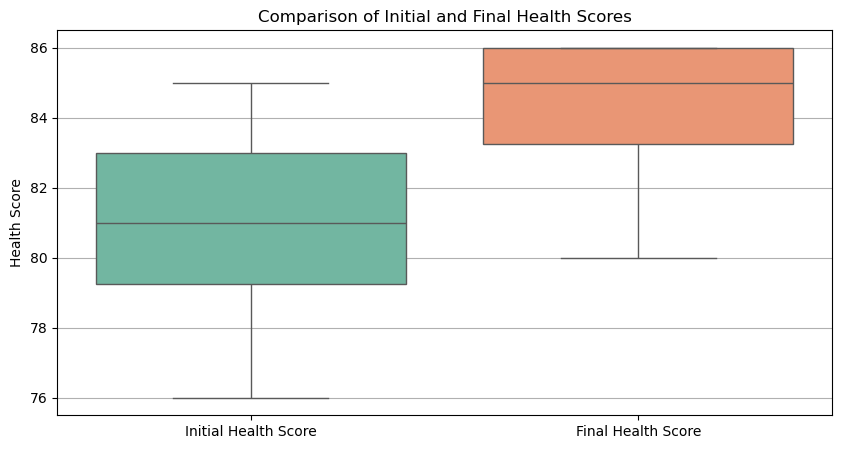

Observed Difference in Means: 3.30
95% Bootstrap Confidence Interval: (1.20, 5.40)


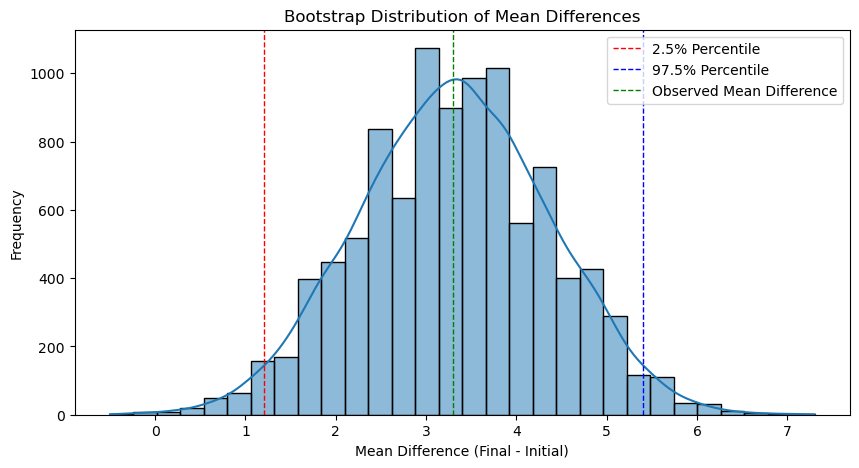

In [11]:
#Q8: 

# Problem Introduction

    # An explaination of the meaning of a Null Hypothesis of "no effect" in this context
        # The null hypothesis (H0) in this context states that there is "no effect" of the 
        # vaccine on the health scores of patients. This means that the average final 
        # health score after vaccination is equal to the average initial health score before vaccination:
        # H0: μFinal−μInitial = 0
        # If we reject the null hypothesis, it would suggest that the vaccine has a significant 
        # effect on improving health scores.
        
    # Data Visualization (motivating and illustrating the comparison of interest)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the provided data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Visualizing Initial vs Final Health Scores
plt.figure(figsize=(10, 5))
sns.boxplot(data=[df['InitialHealthScore'], df['FinalHealthScore']], palette="Set2")
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.title('Comparison of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.grid(axis='y')
plt.show()



# Quantitative Analysis

    # Methodology Code and Explanations

import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Calculate initial and final health score means
mean_initial = df['InitialHealthScore'].mean()
mean_final = df['FinalHealthScore'].mean()

# Bootstrapping
n_iterations = 10000
bootstrap_means_diff = []

for _ in range(n_iterations):
    # Resample with replacement
    sample_initial = np.random.choice(df['InitialHealthScore'], size=len(df), replace=True)
    sample_final = np.random.choice(df['FinalHealthScore'], size=len(df), replace=True)
    
    # Calculate the difference in means
    mean_diff = sample_final.mean() - sample_initial.mean()
    bootstrap_means_diff.append(mean_diff)

# Calculate the confidence interval
lower_bound = np.percentile(bootstrap_means_diff, 2.5)
upper_bound = np.percentile(bootstrap_means_diff, 97.5)

# Results
mean_diff_observed = mean_final - mean_initial
print(f"Observed Difference in Means: {mean_diff_observed:.2f}")
print(f"95% Bootstrap Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

    # Explain: The methodology employed here uses bootstrapping to generate a distribution of 
    # the difference in means between final and initial health scores. We resampled 
    # the data many times and calculated the means of each resampled dataset 
    # to build an empirical distribution of the differences.
    
    
    # Supporting Visualizations
plt.figure(figsize=(10, 5))
sns.histplot(bootstrap_means_diff, bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='2.5% Percentile')
plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=1, label='97.5% Percentile')
plt.axvline(mean_diff_observed, color='green', linestyle='dashed', linewidth=1, label='Observed Mean Difference')
plt.title('Bootstrap Distribution of Mean Differences')
plt.xlabel('Mean Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



# Findings and Discussion

    # Conclusion regarding a Null Hypothesis of "no effect"
        # If the calculated 95% confidence interval for the difference in means excludes zero, 
        # we reject the null hypothesis H0: μFinal−μInitial = 0, indicating that the vaccine 
        # has a significant effect on improving health scores. Conversely, if the confidence 
        # interval includes zero, we fail to reject the null hypothesis, suggesting that 
        # there is insufficient evidence to claim the vaccine is effective.
    # Further Consideration
        # Discuss potential limitations of the study, including sample size and demographics.
        # Consider additional analyses that could provide more insights, such as examining the effects by age or gender.
        # Suggest future research directions to further evaluate the vaccine’s effectiveness over larger and more diverse populations.

In [ ]:
# Interaction log for Q8: https://chatgpt.com/share/66ff5395-9318-8000-bb2b-149f56cd5440

In [ ]:
#Q9: Yes